In [8]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
diamonds = sns.load_dataset("diamonds")
diamonds.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.describe(exclude=np.number)
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
import sklearn;
from sklearn.model_selection import train_test_split

"""
diamonds = diamonds.drop('cut', axis=1)
diamonds = diamonds.drop('color', axis=1)
diamonds = diamonds.drop('clarity', axis=1)
diamonds = diamonds.drop('depth', axis=1)
diamonds = diamonds.drop('table', axis=1)
"""

# Extract feature and target arrays
X, y = diamonds.drop('price', axis=1), diamonds[['price']]
#X, y = diamonds[['carat']], diamonds[['price']]

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
  X[col] = X[col].astype('category')

X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

import xgboost as xgb

# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123,enable_categorical=True) 

# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 


RMSE :  552.861307


In [12]:
#Using Validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

import xgboost as xgb

# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 1000, seed = 123,enable_categorical=True,early_stopping_rounds=50) 

# Fitting the model, with VALIDATION with addtnal param eval_set
xgb_r.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test,y_test)]) 


# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
print("best iteration is:")
print(xgb_r.best_iteration)


[0]	validation_0-rmse:2874.49146	validation_1-rmse:2817.90814
[1]	validation_0-rmse:2092.16823	validation_1-rmse:2054.95423
[2]	validation_0-rmse:1552.12189	validation_1-rmse:1527.41146
[3]	validation_0-rmse:1187.31114	validation_1-rmse:1177.15463
[4]	validation_0-rmse:945.00210	validation_1-rmse:946.17688
[5]	validation_0-rmse:787.62126	validation_1-rmse:798.39908
[6]	validation_0-rmse:688.66889	validation_1-rmse:710.32109
[7]	validation_0-rmse:626.37436	validation_1-rmse:654.59324
[8]	validation_0-rmse:589.02723	validation_1-rmse:624.32385
[9]	validation_0-rmse:565.28857	validation_1-rmse:604.03193
[10]	validation_0-rmse:548.36512	validation_1-rmse:592.03160
[11]	validation_0-rmse:538.14853	validation_1-rmse:582.18167
[12]	validation_0-rmse:531.04914	validation_1-rmse:576.99121
[13]	validation_0-rmse:523.65001	validation_1-rmse:571.84722
[14]	validation_0-rmse:517.23823	validation_1-rmse:569.23515
[15]	validation_0-rmse:512.12649	validation_1-rmse:565.44660
[16]	validation_0-rmse:508

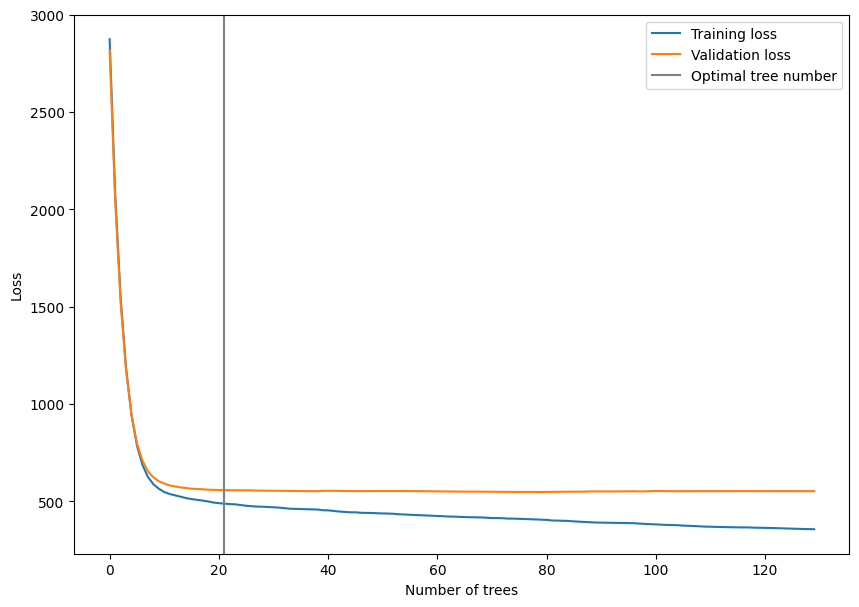

In [13]:
results = xgb_r.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()